In [41]:

from DNA import DNA
from Graficador import *
from Seleccion import Seleccion
import pandas as pd
from Cromosoma import Cromosoma

In [42]:
DATOS_EN_TABLA = '../TablaCapitales.xlsx' 
RUTA =  DATOS_EN_TABLA
FILAS_TABLA = 24 
lista_provincias_visitadas = []
cantidad_km = 0 

df = pd.read_excel(DATOS_EN_TABLA)

def devolver_informacion_tabla_crudo():
    df = pd.read_excel(RUTA)
    tabla = df.values 
 
    return tabla

In [43]:
def procesar_informacion_tabla(tabla: pd.DataFrame):
    lista_provincias = list(tabla[:,0])
    
    return [lista_provincias, tabla]

lista_provincias,tabla = procesar_informacion_tabla(devolver_informacion_tabla_crudo())

In [44]:
 

def get_distance(city1: str, city2: str) -> float:
    distancia = tabla[city1][city2+1]
    if type(distancia) == float:
        return distancia 


Generando un marco de datos

In [45]:
datos = []


In [46]:
obtener_mejor_cromosoma = lambda poblacion: sorted(poblacion, key=lambda cromosoma: cromosoma.fitness, reverse=True)[0]

In [47]:
def ciclo(poblacion,fObjetivo,fFitness,numero_ciclo):
    DNA1 =  DNA(poblacion)
    elites = []
    res_objetivo = DNA1.calcular_objetivo(fObjetivo)
    res_fitness = DNA1.calcular_fitness(fFitness)
 
 
    elites = Seleccion.elitismo(DNA1.poblacion,2)  
    cantidad = 50-len(elites)
    
    cromosomas_padres = Seleccion.torneo(DNA1.poblacion,cantidad) 
    cromosomas_hijos = DNA.cruzar_poblacion_numeros(cromosomas_padres)    

    mejor_cromosoma = obtener_mejor_cromosoma(poblacion)
    datos.append([numero_ciclo,mejor_cromosoma.genes,mejor_cromosoma.fitness,mejor_cromosoma.objetivo])

    if len(cromosomas_hijos)>0:
        nueva_poblacion = cromosomas_hijos + elites

    return nueva_poblacion


In [48]:
import pandas as pd
ciclos = 200
cantidad_cromosomas = 50
funcion_objetivo = lambda x,y: get_distance(x,y)       
fitness = lambda x: 1/x  
Cromosoma.setProbMutacion(0.4)
Cromosoma.setProbCrossover(0.75)
poblacion = DNA.generar_poblacion_numeros(cantidad_cromosomas) 
mejor_cromosoma = [0,None] 

for i in range(ciclos):
    nueva_poblacion = ciclo(poblacion,funcion_objetivo,fitness,i)

    if i == ciclos-1:
        res = obtener_mejor_cromosoma(poblacion)
        mejor_cromosoma[0] = res.objetivo
        mejor_cromosoma[1] = res 
            
    
    poblacion = nueva_poblacion 

    
ultimo_cromosoma = mejor_cromosoma[1]
dist_total = 0
datos_mejor_cromosoma = []

for ciudad in range(0,len(ultimo_cromosoma.genes)-1):
    ciudad1 = ultimo_cromosoma.genes[ciudad]
    ciudad2 = ultimo_cromosoma.genes[ciudad+1]
    distancia = get_distance(ciudad1,ciudad2)
    dist_total += distancia
    
    datos_mejor_cromosoma.append([lista_provincias[ciudad1],lista_provincias[ciudad2],int(distancia)])


ciudad_inicio = ultimo_cromosoma.genes[0]
ciudad_fin = ultimo_cromosoma.genes[-1]
distancia_inicio_fin = get_distance(ciudad_inicio,ciudad_fin)


datos_mejor_cromosoma.append([lista_provincias[ciudad_fin],lista_provincias[ciudad_inicio],int(distancia_inicio_fin)])

df = pd.DataFrame(datos_mejor_cromosoma, columns=['Ciudad 1','Ciudad 2','Distancia'])
df['Distancia Acumulada'] = df['Distancia'].cumsum()
print(f'KM(Totales):  {ultimo_cromosoma.objetivo} km | fitness = {ultimo_cromosoma.fitness}') 
df







KM(Totales):  11116.0 km | fitness = 8.99604174163368e-05


,Ciudad 1,Ciudad 2,Distancia,Distancia Acumulada
0,Paraná,Santa Rosa,642,642
1,Santa Rosa,Neuquén,422,1064
2,Neuquén,Ushuaia,1762,2826
3,Ushuaia,Río Gallegos,359,3185
4,Río Gallegos,Rawson,975,4160
5,Rawson,Posadas,1951,6111
6,Posadas,Formosa,263,6374
7,Formosa,Corrientes,157,6531
8,Corrientes,Resistencia,13,6544
9,Resistencia,Mendoza,1121,7665


In [49]:
df = pd.DataFrame(datos, columns=['i', 'ruta', 'fitness', 'objetivo'])
df


,i,ruta,fitness,objetivo
0,0,"[9, 7, 4, 22, 12, 11, 18, 13, 15, 14, 10, 19, ...",0.000046,21891.0
1,1,"[9, 13, 17, 22, 12, 3, 11, 1, 15, 14, 7, 10, 8...",0.000050,19802.0
2,2,"[9, 13, 17, 22, 12, 3, 11, 1, 15, 14, 7, 10, 8...",0.000050,19802.0
3,3,"[9, 13, 17, 22, 12, 3, 11, 1, 16, 14, 7, 10, 8...",0.000051,19800.0
4,4,"[9, 13, 17, 22, 12, 3, 11, 1, 16, 14, 7, 10, 8...",0.000051,19800.0
...,...,...,...,...
195,195,"[8, 20, 7, 22, 12, 10, 9, 3, 2, 11, 6, 17, 5, ...",0.000090,11116.0
196,196,"[8, 20, 7, 22, 12, 10, 9, 3, 2, 11, 6, 17, 5, ...",0.000090,11116.0
197,197,"[8, 20, 7, 22, 12, 10, 9, 3, 2, 11, 6, 17, 5, ...",0.000090,11116.0
198,198,"[8, 20, 7, 22, 12, 10, 9, 3, 2, 11, 6, 17, 5, ...",0.000090,11116.0


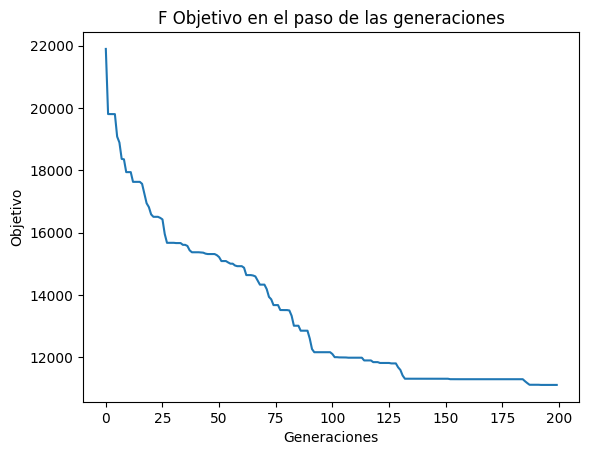

In [50]:
import matplotlib.pyplot as plt


objetivos, pasos = df['objetivo'], df['i']

plt.plot(pasos, objetivos)
plt.xlabel('Generaciones')
plt.ylabel('Objetivo')
plt.title('F Objetivo en el paso de las generaciones')
plt.show()
